# Ridership analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
bus_routes = pd.read_json('../data/cleaned/BusRoutes.json', lines=True)
bus_ridership_202409 = pd.read_csv('../data/cleaned/BusRideVolume202409.csv', dtype={'PT_CODE': int})

In [22]:
bus_routes.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309


In [24]:
bus_ridership_202409.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-09,WEEKENDS/HOLIDAY,5.0,BUS,59239,35,27
1,2024-09,WEEKENDS/HOLIDAY,10.0,BUS,64241,772,380
2,2024-09,WEEKDAY,18.0,BUS,53241,907,1534
3,2024-09,WEEKDAY,20.0,BUS,11161,4363,5982
4,2024-09,WEEKENDS/HOLIDAY,13.0,BUS,70041,565,495


### Understanding the ridership data in general

In [25]:
average_ridership_by_time = bus_ridership_202409.groupby(['TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
}).reset_index()
average_ridership_by_time.columns = ['TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']

In [26]:
average_ridership_by_time

,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,0.0,WEEKDAY,64.845067,3.0,34.00,94.574234,10.00,111.00
1,0.0,WEEKENDS/HOLIDAY,34.155139,1.0,18.00,49.713103,6.00,58.00
2,1.0,WEEKDAY,7.057034,0.0,4.00,16.459533,2.00,18.00
3,1.0,WEEKENDS/HOLIDAY,3.771991,0.0,3.00,9.078125,2.00,10.00
4,2.0,WEEKDAY,1.422222,0.0,3.00,2.200000,1.00,2.00
5,2.0,WEEKENDS/HOLIDAY,0.775510,0.0,1.00,2.081633,1.00,2.00
6,3.0,WEEKDAY,2.263158,0.0,4.00,3.894737,1.00,5.50
7,3.0,WEEKENDS/HOLIDAY,2.888889,0.0,3.75,2.722222,1.00,3.50
8,4.0,WEEKDAY,91.360000,0.0,8.00,4.240000,0.00,3.00
9,4.0,WEEKENDS/HOLIDAY,4.358974,0.0,4.00,2.307692,0.00,2.50


Plot ridership data by time of hour for tap in/tap out volume and whether or not it is a weekday

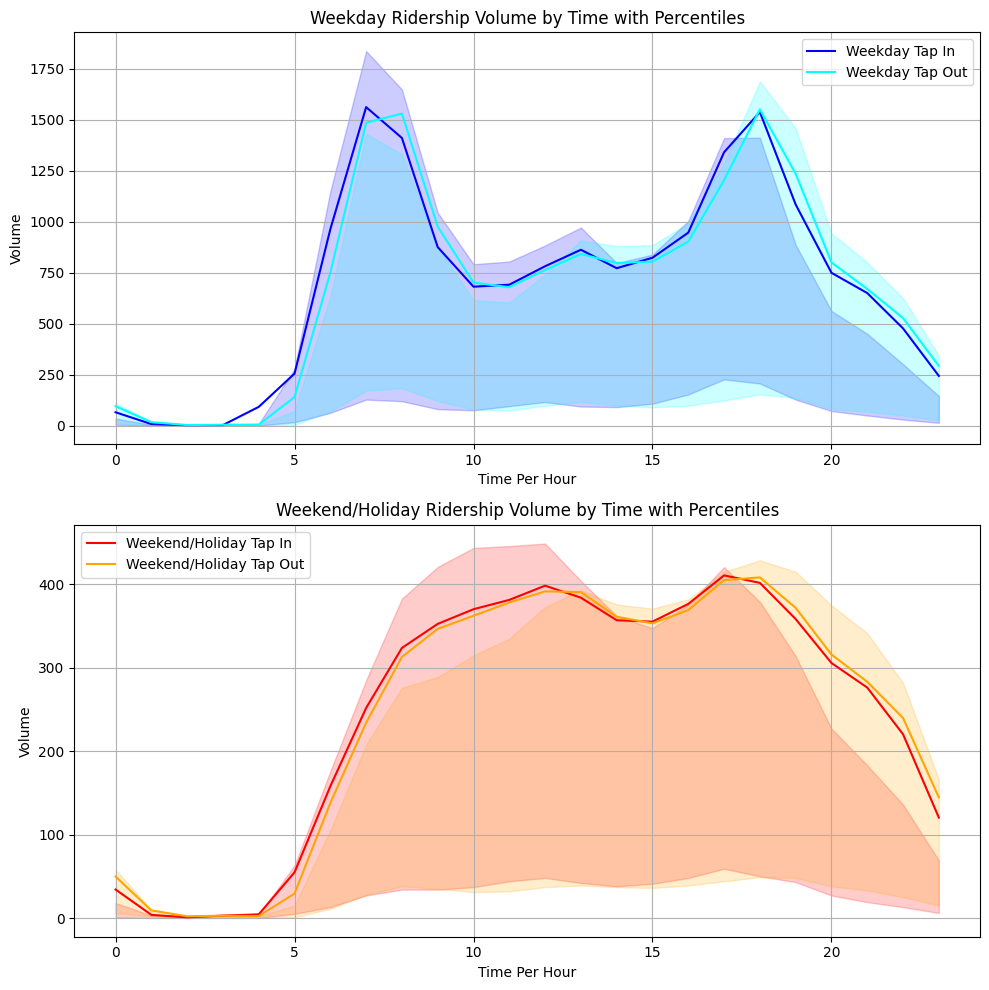

In [27]:
# Filter data for weekdays and weekends/holidays
weekdays = average_ridership_by_time[average_ridership_by_time['DAY_TYPE'] == 'WEEKDAY']
weekends = average_ridership_by_time[average_ridership_by_time['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot for weekdays with shaded area
axes[0].plot(weekdays['TIME_PER_HOUR'], weekdays['TAP_IN_MEAN'], label='Weekday Tap In', color='blue')
axes[0].fill_between(weekdays['TIME_PER_HOUR'],
                     weekdays['TAP_IN_25'],
                     weekdays['TAP_IN_75'],
                     color='blue', alpha=0.2)
axes[0].plot(weekdays['TIME_PER_HOUR'], weekdays['TAP_OUT_MEAN'], label='Weekday Tap Out', color='cyan')
axes[0].fill_between(weekdays['TIME_PER_HOUR'],
                     weekdays['TAP_OUT_25'],
                     weekdays['TAP_OUT_75'],
                     color='cyan', alpha=0.2)

# Add labels and title for weekdays plot
axes[0].set_xlabel('Time Per Hour')
axes[0].set_ylabel('Volume')
axes[0].set_title('Weekday Ridership Volume by Time with Percentiles')
axes[0].legend()
axes[0].grid(True)

# Plot for weekends/holidays with shaded area
axes[1].plot(weekends['TIME_PER_HOUR'], weekends['TAP_IN_MEAN'], label='Weekend/Holiday Tap In', color='red')
axes[1].fill_between(weekends['TIME_PER_HOUR'],
                     weekends['TAP_IN_25'],
                     weekends['TAP_IN_75'],
                     color='red', alpha=0.2)
axes[1].plot(weekends['TIME_PER_HOUR'], weekends['TAP_OUT_MEAN'], label='Weekend/Holiday Tap Out', color='orange')
axes[1].fill_between(weekends['TIME_PER_HOUR'],
                     weekends['TAP_OUT_25'],
                     weekends['TAP_OUT_75'],
                     color='orange', alpha=0.2)

# Add labels and title for weekends/holidays plot
axes[1].set_xlabel('Time Per Hour')
axes[1].set_ylabel('Volume')
axes[1].set_title('Weekend/Holiday Ridership Volume by Time with Percentiles')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Seems like the ridership data for weekend tap out is a little skewed, since the mean is higher than the 75th percentile

### Picking a bus route to analyse if ridership is lower for some of its BusStopCodes
TODO: right now just checking if for any bus stop code, the ridership is lower than 25th percentile, whether or not it is Weekend/Weekday, and disregarding time of day  
Might want to average across tapin/tapout, time of day and weekday/weekend based on the number of trips.

In [28]:
# read the bus trips data

bus_trips = pd.read_csv("../data/origin_destination_bus_202408.csv")
bus_trips

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2024-08,WEEKENDS/HOLIDAY,18,BUS,76201,76079,6
1,2024-08,WEEKENDS/HOLIDAY,7,BUS,10351,13201,7
2,2024-08,WEEKENDS/HOLIDAY,19,BUS,76061,75371,1
3,2024-08,WEEKENDS/HOLIDAY,9,BUS,14271,7021,2
4,2024-08,WEEKDAY,5,BUS,54581,66471,1
...,...,...,...,...,...,...,...
5760076,2024-08,WEEKENDS/HOLIDAY,20,BUS,60069,46009,13
5760077,2024-08,WEEKDAY,8,BUS,76141,75311,58
5760078,2024-08,WEEKDAY,10,BUS,11369,28221,1
5760079,2024-08,WEEKDAY,18,BUS,75419,66381,1


In [29]:
bus_trips[(bus_trips['ORIGIN_PT_CODE'] == 75009) & (bus_trips['DESTINATION_PT_CODE'] == 76059)]

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
213122,2024-08,WEEKDAY,9,BUS,75009,76059,196
258755,2024-08,WEEKDAY,22,BUS,75009,76059,26
424464,2024-08,WEEKENDS/HOLIDAY,20,BUS,75009,76059,41
469509,2024-08,WEEKDAY,15,BUS,75009,76059,301
765365,2024-08,WEEKDAY,5,BUS,75009,76059,4
826191,2024-08,WEEKENDS/HOLIDAY,18,BUS,75009,76059,77
868031,2024-08,WEEKENDS/HOLIDAY,22,BUS,75009,76059,13
910785,2024-08,WEEKDAY,21,BUS,75009,76059,45
1129234,2024-08,WEEKDAY,7,BUS,75009,76059,91
1237715,2024-08,WEEKENDS/HOLIDAY,8,BUS,75009,76059,70


In [30]:
# Sort by ServiceNo and StopSequence to ensure proper order
bus_routes_grouped = bus_routes.sort_values(by=['ServiceNo', 'Direction', 'StopSequence']).reset_index(drop=True)

# Initialize list to store origin-destination pairs
origin_destination_pairs = []

# Sliding window approach for each ServiceNo
for (service_no, direction), group in bus_routes_grouped.groupby(['ServiceNo', 'Direction']):
    group = group.reset_index(drop=True)
    
    for i in range(len(group) - 1):
        # Set current stop as origin and next stop as destination
        origin_stop = group.iloc[i]
        destination_stop = group.iloc[i + 1]
        
        origin_destination_pairs.append({
            'ServiceNo': service_no,
            'Direction': direction,
            'Origin_Stop': origin_stop['BusStopCode'],
            'Destination_Stop': destination_stop['BusStopCode'],
            'Origin_StopSequence': origin_stop['StopSequence'],
            'Destination_StopSequence': destination_stop['StopSequence']
        })

# Convert the result to DataFrame
bus_routes_od_df = pd.DataFrame(origin_destination_pairs)


In [31]:
# Merge the bus_routes_od_df with bus trips
bus_routes_trips = pd.merge(
    bus_routes_od_df,
    bus_trips,
    left_on=['Origin_Stop', 'Destination_Stop'],
    right_on=['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'],
    how = 'inner'
)


bus_routes_trips = bus_routes_trips[[
    'ServiceNo', 'Direction', 'Origin_Stop', 'Destination_Stop', 'Origin_StopSequence', 'Destination_StopSequence',
    'DAY_TYPE', 'TIME_PER_HOUR', 'PT_TYPE', 'TOTAL_TRIPS'
]]


bus_routes_trips[(bus_routes_trips['ServiceNo'] == '10') & (bus_routes_trips['Direction'] == 1) & (bus_routes_trips['DAY_TYPE'] == 'WEEKDAY') & (bus_routes_trips['TIME_PER_HOUR'] == 9)]

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS
0,10,1,75009,76059,1,2,WEEKDAY,9,BUS,196
425,10,1,76059,76069,2,3,WEEKDAY,9,BUS,72
846,10,1,76069,96289,3,4,WEEKDAY,9,BUS,493
959,10,1,96289,96109,4,5,WEEKDAY,9,BUS,23
1136,10,1,96109,85079,5,6,WEEKDAY,9,BUS,33
...,...,...,...,...,...,...,...,...,...,...
16405,10,1,16041,16051,69,70,WEEKDAY,9,BUS,1
16521,10,1,16051,16061,70,71,WEEKDAY,9,BUS,1
16637,10,1,16061,16071,71,72,WEEKDAY,9,BUS,1
16815,10,1,16071,16081,72,73,WEEKDAY,9,BUS,2


### Using Bus frequency data to get deeper insights
We will try using the indiviual bus frequency to model number of trips per hour. This will allow us to see the discreapcy between the the number of estimated trips vs number of actual trips in the road deployed.

Assumption here: There is at most 1 parrell route given a bus segement 

In [32]:
bus_frequency = pd.read_json("../data/BusServices.json")
bus_frequency

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,118,GAS,1,TRUNK,65009,97009,5-08,8-12,8-10,09-14,
1,118,GAS,2,TRUNK,97009,65009,10-10,8-11,4-08,9-12,
2,118A,GAS,1,TRUNK,65009,96119,06-66,-,-,-,
3,118B,GAS,1,TRUNK,96111,65191,-,-,24-57,-,
4,119,GAS,1,TRUNK,65009,65009,09-13,12-18,12-15,15-17,Hougang St 21
...,...,...,...,...,...,...,...,...,...,...,...
722,98B,TTS,1,TRUNK,28501,21099,05-52,-,-,-,
723,98M,TTS,1,TRUNK,28009,28009,-,17-18,-,12-17,Corporation Rd
724,990,TTS,1,TRUNK,43009,43009,11-11,13-15,12-14,12-14,Jurong Gateway Rd
725,992,TTS,1,TRUNK,43009,41009,03-09,08-12,04-08,04-13,


In [33]:
bus_frequency[bus_frequency['ServiceNo'] == '241']

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
506,241,SMRT,1,FEEDER,22009,22009,04-07,04-10,06-08,06-09,Jurong West St 91


In [34]:
# Function to calculate avaerage from frequency range
def mean_frequency(freq):
    if freq == '-' or pd.isna(freq):
        return None  # Handle missing or empty frequencies
    # Split frequency range and convert to integers
    range_vals = list(map(int, freq.split('-')))
    return sum(range_vals) / 2  # Calculate the mean


In [35]:
# Apply median calculation to each frequency column
bus_frequency['AM_Peak_Freq'] = bus_frequency['AM_Peak_Freq'].apply(mean_frequency)
bus_frequency['AM_Offpeak_Freq'] = bus_frequency['AM_Offpeak_Freq'].apply(mean_frequency)
bus_frequency['PM_Peak_Freq'] = bus_frequency['PM_Peak_Freq'].apply(mean_frequency)
bus_frequency['PM_Offpeak_Freq'] = bus_frequency['PM_Offpeak_Freq'].apply(mean_frequency)

bus_frequency = bus_frequency.fillna(0)

# Drop the Operator column
bus_frequency = bus_frequency.drop(columns=['Operator', 'Category', 'LoopDesc'])
for period in ['AM_Peak_Freq', 'AM_Offpeak_Freq', 'PM_Peak_Freq', 'PM_Offpeak_Freq']:
    bus_frequency[period + '_Trips_per_Hour'] = np.where(bus_frequency[period] > 0, 60 / bus_frequency[period], 0).astype(int)

bus_frequency = bus_frequency.rename(columns={'OriginCode': 'ORIGIN_PT_CODE', 'DestinationCode':'DESTINATION_PT_CODE'})

# Replace empty strings with NaN in both columns
bus_frequency['ORIGIN_PT_CODE'] = bus_frequency['ORIGIN_PT_CODE'].replace('', np.nan)
bus_frequency['DESTINATION_PT_CODE'] = bus_frequency['DESTINATION_PT_CODE'].replace('', np.nan)

# Drop rows where either ORIGIN_PT_CODE or DESTINATION_PT_CODE is NaN
bus_frequency = bus_frequency.dropna(subset=['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'])

# Convert columns to integers
bus_frequency['ORIGIN_PT_CODE'] = bus_frequency['ORIGIN_PT_CODE'].astype(int)
bus_frequency['DESTINATION_PT_CODE'] = bus_frequency['DESTINATION_PT_CODE'].astype(int)



bus_frequency.head()

,ServiceNo,Direction,ORIGIN_PT_CODE,DESTINATION_PT_CODE,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,AM_Peak_Freq_Trips_per_Hour,AM_Offpeak_Freq_Trips_per_Hour,PM_Peak_Freq_Trips_per_Hour,PM_Offpeak_Freq_Trips_per_Hour
0,118,1,65009,97009,6.5,10.0,9.0,11.5,9,6,6,5
1,118,2,97009,65009,10.0,9.5,6.0,10.5,6,6,10,5
2,118A,1,65009,96119,36.0,0.0,0.0,0.0,1,0,0,0
3,118B,1,96111,65191,0.0,0.0,40.5,0.0,0,0,1,0
4,119,1,65009,65009,11.0,15.0,13.5,16.0,5,4,4,3


In [36]:
# Function to categorize the hour and update the TOTAL_TRIPS
def estimate_trips(row, freq_df):
    # Define time categories for AM/PM peak and off-peak
    am_peak_hours = [6,7, 8]
    am_offpeak_hours = [9, 10, 11, 12, 13, 14, 15, 16]
    pm_peak_hours = [17, 18]
    pm_offpeak_hours = [19, 20, 21, 22, 23]

    # Retrieve the frequency data for the current ServiceNo and Direction
    freq_row = freq_df[(freq_df['ServiceNo'] == row['ServiceNo']) & 
                       (freq_df['Direction'] == row['Direction'])]
    
    # Check if a matching row exists
    if freq_row.empty:
        return None  # Or another appropriate value if no match
    
    # Determine the estimated trips based on time of day
    if row['TIME_PER_HOUR'] in am_peak_hours:
        return freq_row['AM_Peak_Freq_Trips_per_Hour'].values[0]
    elif row['TIME_PER_HOUR'] in am_offpeak_hours:
        return freq_row['AM_Offpeak_Freq_Trips_per_Hour'].values[0]
    elif row['TIME_PER_HOUR'] in pm_peak_hours:
        return freq_row['PM_Peak_Freq_Trips_per_Hour'].values[0]
    elif row['TIME_PER_HOUR'] in pm_offpeak_hours:
        return freq_row['PM_Offpeak_Freq_Trips_per_Hour'].values[0]
    else:
        return 0  # For times outside of defined ranges

# Apply the function row-wise
bus_routes_trips['Estimated_Trips'] = bus_routes_trips.apply(lambda row: estimate_trips(row, bus_frequency), axis=1)

In [37]:
# Group by ServiceNo and Direction, then find the maximum Destination_StopSequence for each group
max_stop_sequence = bus_routes_trips.groupby(['ServiceNo', 'Direction'])['Destination_StopSequence'].max().reset_index()

# Rename the column for clarity
max_stop_sequence = max_stop_sequence.rename(columns={'Destination_StopSequence': 'Max_StopSequence'})

# Merge the max stop sequence information back into the original dataframe if desired
bus_routes_trips = bus_routes_trips.merge(max_stop_sequence, on=['ServiceNo', 'Direction'], how='left')


bus_routes_trips

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Estimated_Trips,Max_StopSequence
0,10,1,75009,76059,1,2,WEEKDAY,9,BUS,196,5,74
1,10,1,75009,76059,1,2,WEEKDAY,22,BUS,26,3,74
2,10,1,75009,76059,1,2,WEEKENDS/HOLIDAY,20,BUS,41,3,74
3,10,1,75009,76059,1,2,WEEKDAY,15,BUS,301,5,74
4,10,1,75009,76059,1,2,WEEKDAY,5,BUS,4,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...
713494,993,1,40329,43453,18,19,WEEKDAY,9,BUS,2,3,25
713495,993,1,40329,43453,18,19,WEEKENDS/HOLIDAY,9,BUS,2,3,25
713496,993,1,40329,43453,18,19,WEEKDAY,8,BUS,5,4,25
713497,993,1,40329,43453,18,19,WEEKDAY,18,BUS,3,3,25


In [38]:

bus_routes_trips[(bus_routes_trips['Destination_Stop'] == 53241) & (bus_routes_trips['TIME_PER_HOUR'] == 18)]

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Estimated_Trips,Max_StopSequence
394571,156,1,54531,53241,24,25,WEEKDAY,18,BUS,17,4,64
394575,156,1,54531,53241,24,25,WEEKENDS/HOLIDAY,18,BUS,4,4,64
394600,162,1,54531,53241,10,11,WEEKDAY,18,BUS,17,4,57
394604,162,1,54531,53241,10,11,WEEKENDS/HOLIDAY,18,BUS,4,4,57
394629,50,2,54531,53241,43,44,WEEKDAY,18,BUS,17,6,47
394633,50,2,54531,53241,43,44,WEEKENDS/HOLIDAY,18,BUS,4,6,47
394658,53,1,54531,53241,88,89,WEEKDAY,18,BUS,17,6,91
394662,53,1,54531,53241,88,89,WEEKENDS/HOLIDAY,18,BUS,4,6,91
394687,55,2,54531,53241,48,49,WEEKDAY,18,BUS,17,6,52
394691,55,2,54531,53241,48,49,WEEKENDS/HOLIDAY,18,BUS,4,6,52


In [39]:
bus_ridership_202409

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-09,WEEKENDS/HOLIDAY,5.0,BUS,59239,35,27
1,2024-09,WEEKENDS/HOLIDAY,10.0,BUS,64241,772,380
2,2024-09,WEEKDAY,18.0,BUS,53241,907,1534
3,2024-09,WEEKDAY,20.0,BUS,11161,4363,5982
4,2024-09,WEEKENDS/HOLIDAY,13.0,BUS,70041,565,495
...,...,...,...,...,...,...,...
199895,2024-09,WEEKENDS/HOLIDAY,21.0,BUS,22051,58,0
199896,2024-09,WEEKENDS/HOLIDAY,5.0,BUS,14071,1,0
199897,2024-09,WEEKENDS/HOLIDAY,13.0,BUS,25551,4,0
199898,2024-09,WEEKENDS/HOLIDAY,22.0,BUS,59669,45,0


In [40]:
bus_ridership = bus_routes_trips.merge(
    bus_ridership_202409,
    left_on=['DAY_TYPE', 'TIME_PER_HOUR', 'Destination_Stop'],
    right_on=['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE'],
    how='left'
)

bus_ridership['Adj_Estimated_Trips'] = bus_ridership[['TOTAL_TRIPS', 'Estimated_Trips']].min(axis=1)

bus_ridership['Est_Tap_In'] = bus_ridership.apply(lambda row: row['TOTAL_TAP_IN_VOLUME'] * row['Adj_Estimated_Trips']/ row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else None, axis=1)
bus_ridership['Est_Tap_Out'] = bus_ridership.apply(lambda row: row['TOTAL_TAP_OUT_VOLUME'] * row['Adj_Estimated_Trips'] / row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else None, axis=1)

bus_ridership = bus_ridership[['ServiceNo', 'Direction', 'Origin_Stop',	'Destination_Stop', 'Origin_StopSequence', 'Destination_StopSequence','Max_StopSequence',	'DAY_TYPE',	
                               'TIME_PER_HOUR',	'TOTAL_TRIPS'	,'Estimated_Trips', 'TOTAL_TAP_IN_VOLUME',	'TOTAL_TAP_OUT_VOLUME',	'Adj_Estimated_Trips', 'Est_Tap_In'	, 'Est_Tap_Out']]

bus_ridership

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,Max_StopSequence,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS,Estimated_Trips,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,Adj_Estimated_Trips,Est_Tap_In,Est_Tap_Out
0,10,1,75009,76059,1,2,74,WEEKDAY,9,196,5,2972.0,2970.0,5,75.816327,75.765306
1,10,1,75009,76059,1,2,74,WEEKDAY,22,26,3,2958.0,271.0,3,341.307692,31.269231
2,10,1,75009,76059,1,2,74,WEEKENDS/HOLIDAY,20,41,3,2037.0,268.0,3,149.048780,19.609756
3,10,1,75009,76059,1,2,74,WEEKDAY,15,301,5,4563.0,1978.0,5,75.797342,32.857143
4,10,1,75009,76059,1,2,74,WEEKDAY,5,4,0,679.0,443.0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713494,993,1,40329,43453,18,19,25,WEEKDAY,9,2,3,155.0,275.0,2,155.000000,275.000000
713495,993,1,40329,43453,18,19,25,WEEKENDS/HOLIDAY,9,2,3,65.0,98.0,2,65.000000,98.000000
713496,993,1,40329,43453,18,19,25,WEEKDAY,8,5,4,522.0,847.0,4,417.600000,677.600000
713497,993,1,40329,43453,18,19,25,WEEKDAY,18,3,3,537.0,424.0,3,537.000000,424.000000


### Based on ridership data, identify low usage bus 


In [41]:
# Merge data with average_ridership_by_time

bus_ridership_mean = bus_ridership.merge(
    average_ridership_by_time,
    on=['TIME_PER_HOUR', 'DAY_TYPE'], 
    how='left'
)


bus_ridership_mean['TAP_IN_MEAN'] = bus_ridership_mean.apply(lambda row: row['TAP_IN_MEAN'] * row['Adj_Estimated_Trips']/ row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else 0, axis=1)
bus_ridership_mean['TAP_OUT_MEAN'] = bus_ridership_mean.apply(lambda row: row['TAP_OUT_MEAN'] * row['Adj_Estimated_Trips'] / row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else 0, axis=1)


bus_ridership_mean['TAP_IN_25'] = bus_ridership_mean.apply(lambda row: row['TAP_IN_25'] * row['Adj_Estimated_Trips']/ row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else 0, axis=1)
bus_ridership_mean['TAP_OUT_25'] = bus_ridership_mean.apply(lambda row: row['TAP_OUT_25'] * row['Adj_Estimated_Trips'] / row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else 0, axis=1)

bus_ridership_mean['TAP_IN_75'] = bus_ridership_mean.apply(lambda row: row['TAP_IN_75'] * row['Adj_Estimated_Trips']/ row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else 0, axis=1)
bus_ridership_mean['TAP_OUT_75'] = bus_ridership_mean.apply(lambda row: row['TAP_OUT_75'] * row['Adj_Estimated_Trips'] / row['TOTAL_TRIPS'] if row['TOTAL_TRIPS'] > 0 else 0, axis=1)

bus_ridership_mean.head()

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,Max_StopSequence,DAY_TYPE,TIME_PER_HOUR,TOTAL_TRIPS,...,TOTAL_TAP_OUT_VOLUME,Adj_Estimated_Trips,Est_Tap_In,Est_Tap_Out,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,10,1,75009,76059,1,2,74,WEEKDAY,9,196,...,2970.0,5,75.816327,75.765306,22.319459,2.040816,26.632653,24.891794,3.061224,22.270408
1,10,1,75009,76059,1,2,74,WEEKDAY,22,26,...,271.0,3,341.307692,31.269231,54.942981,3.346154,34.730769,60.808421,5.653846,72.086538
2,10,1,75009,76059,1,2,74,WEEKENDS/HOLIDAY,20,41,...,268.0,3,149.048780,19.609756,22.373932,1.975610,16.609756,23.118531,2.780488,27.439024
3,10,1,75009,76059,1,2,74,WEEKDAY,15,301,...,1978.0,5,75.797342,32.857143,13.666164,1.777409,13.920266,13.349025,1.478405,14.692691
4,10,1,75009,76059,1,2,74,WEEKDAY,5,4,...,443.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [221]:
def count_exceeding_tap_out_threshold(df, service_no, threshold=0.25):
    """
    Calculate the number of time periods (TimeHour) where the ProportionExceeding exceeds
    a given threshold separately for each direction of a specific bus service, 
    and return both directions in the same row.

    Parameters:
    - df: DataFrame containing bus ridership and estimated trips data.
    - service_no: The service number of the bus (e.g., "10").
    - threshold: The proportion threshold to check against (default is 0.25).

    Returns:
    - result_dict: Dictionary with columns ServiceNo, Direction_1_ExceedingCount, and Direction_2_ExceedingCount.
    """
    
    # Filter the DataFrame for the specified bus service
    service_df = df[df['ServiceNo'] == service_no]
    
    # Initialize counts for each direction
    direction_1_count = 0
    direction_2_count = 0

    # Calculate Max_StopSequence (total stops) for each direction
    max_stop_sequence = service_df.groupby(['ServiceNo', 'Direction'])['Destination_StopSequence'].max().reset_index()
    max_stop_sequence = max_stop_sequence.rename(columns={'Destination_StopSequence': 'Total_Stops'})

    # Merge with the main DataFrame to use the calculated total stops
    service_df = pd.merge(service_df, max_stop_sequence, on=['ServiceNo', 'Direction'], how='left')

    # Process for Direction 1
    direction_1_df = service_df[service_df['Direction'] == 1]
    total_stops_dir_1 = direction_1_df['Total_Stops'].iloc[0] if not direction_1_df.empty else 0
    
    for time_hour in direction_1_df['TIME_PER_HOUR'].unique():
        filtered_df = direction_1_df[direction_1_df['TIME_PER_HOUR'] == time_hour]
        exceeding_count = (filtered_df['TAP_OUT_25'] < filtered_df['Estimated_Trips']).sum()
        proportion_exceeding = exceeding_count / total_stops_dir_1 if total_stops_dir_1 > 0 else 0
        if proportion_exceeding > threshold:
            direction_1_count += 1

    # Process for Direction 2
    direction_2_df = service_df[service_df['Direction'] == 2]
    total_stops_dir_2 = direction_2_df['Total_Stops'].iloc[0] if not direction_2_df.empty else 0

    for time_hour in direction_2_df['TIME_PER_HOUR'].unique():
        filtered_df = direction_2_df[direction_2_df['TIME_PER_HOUR'] == time_hour]
        exceeding_count = (filtered_df['TAP_OUT_25'] < filtered_df['Estimated_Trips']).sum()
        proportion_exceeding = exceeding_count / total_stops_dir_2 if total_stops_dir_2 > 0 else 0
        if proportion_exceeding > threshold:
            direction_2_count += 1

    # Prepare result as a dictionary with both directions in the same row
    result_dict = {
        'ServiceNo': service_no,
        'Direction_1_ExceedingCount': direction_1_count,
        'Direction_2_ExceedingCount': direction_2_count
    }
    
    return result_dict


In [222]:
# test case

results = count_exceeding_tap_out_threshold(
    bus_ridership_mean, '99'
)

results

{'ServiceNo': '99',
 'Direction_1_ExceedingCount': 0,
 'Direction_2_ExceedingCount': 0}

In [242]:
def count_exceeding_by_stop_sequence(df, service_no):
    """
    Calculate the number of times each bus stop sequence exceeds the threshold for each direction
    and for each day type (weekday/weekend).

    Parameters:
    - df: DataFrame containing bus ridership and estimated trips data.
    - service_no: The service number of the bus (e.g., "10").
    - threshold: The proportion threshold to check against (default is 0.25).

    Returns:
    - result_df: DataFrame with columns ServiceNo, Direction, StopSequence, DayType, and ExceedingCount.
    """
    
    # Filter the DataFrame for the specified bus service
    service_df = df[df['ServiceNo'] == service_no]
    
    # Initialize results list to store count of exceedances by stop sequence
    results = []

    # Calculate Max_StopSequence (total stops) for each direction
    max_stop_sequence = service_df.groupby(['ServiceNo', 'Direction'])['Destination_StopSequence'].max().reset_index()
    max_stop_sequence = max_stop_sequence.rename(columns={'Destination_StopSequence': 'Total_Stops'})

    # Merge with the main DataFrame to use the calculated total stops
    service_df = pd.merge(service_df, max_stop_sequence, on=['ServiceNo', 'Direction'], how='left')

    # Process for both directions
    for direction in [1, 2]:
        direction_df = service_df[service_df['Direction'] == direction]

        # Process for both day types
        for day_type in direction_df['DAY_TYPE'].unique():
            day_type_df = direction_df[direction_df['DAY_TYPE'] == day_type]

            # Count exceeding instances by StopSequence
            for stop_sequence in day_type_df['Destination_StopSequence'].unique():
                stop_df = day_type_df[day_type_df['Destination_StopSequence'] == stop_sequence]
                exceeding_count = (stop_df['TAP_OUT_25'] < stop_df['Estimated_Trips']).sum()

                results.append({
                    'ServiceNo': service_no,
                    'Direction': direction,
                    'DayType': day_type,
                    'StopSequence': stop_sequence,
                    'ExceedingCount': exceeding_count
                })
    
    # Convert results to DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df

# Collect results for each bus service
unique_services = bus_routes['ServiceNo'].unique()
all_service_results = [count_exceeding_by_stop_sequence(bus_ridership_mean, service) for service in unique_services]

# Combine all results into a single DataFrame
all_results_df = pd.concat(all_service_results, ignore_index=True)



In [245]:
weekday_results_df = all_results_df[all_results_df['DayType'] == 'WEEKDAY' ]
weekend_results_df = all_results_df[all_results_df['DayType'] == 'WEEKENDS/HOILDAY' ]

weekday_results_df

,ServiceNo,Direction,DayType,StopSequence,ExceedingCount
0,10,1,WEEKDAY,2,12
1,10,1,WEEKDAY,3,8
2,10,1,WEEKDAY,4,15
3,10,1,WEEKDAY,5,0
4,10,1,WEEKDAY,6,1
...,...,...,...,...,...
47754,9B,1,WEEKDAY,27,3
47755,9B,1,WEEKDAY,28,0
47756,9B,1,WEEKDAY,29,0
47757,9B,1,WEEKDAY,2,0


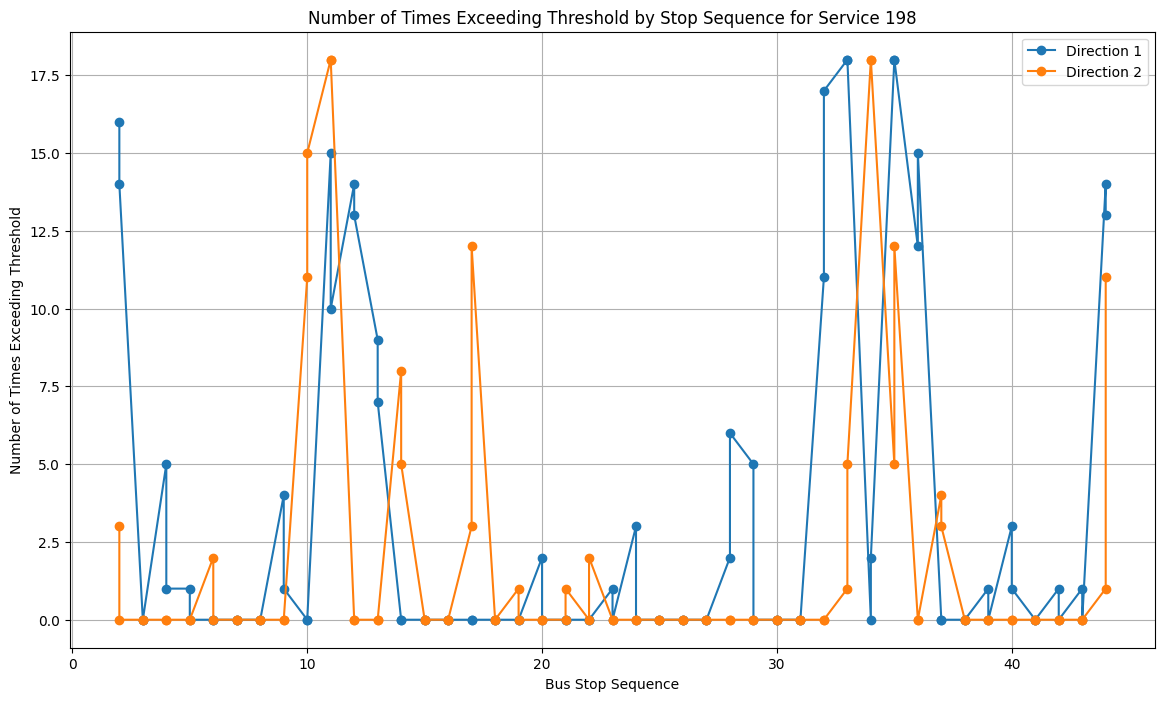

In [247]:
# Plot for a specific service
specific_service = '198'  # Replace with the specific ServiceNo you want to plot
service_results_df = all_results_df[all_results_df['ServiceNo'] == specific_service]

plt.figure(figsize=(14, 8))
for direction in [1, 2]:
    # Filter and sort by StopSequence for each direction
    direction_df = service_results_df[service_results_df['Direction'] == direction].sort_values(by='StopSequence')
    plt.plot(direction_df['StopSequence'], direction_df['ExceedingCount'], label=f'Direction {direction}', marker='o')

plt.xlabel('Bus Stop Sequence')
plt.ylabel('Number of Times Exceeding Threshold')
plt.title(f'Number of Times Exceeding Threshold by Stop Sequence for Service {specific_service}')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
help_df = help_df.sort_values(by='Direction_1_ExceedingCount',ascending=False).reset_index(drop=True)

help_df

,ServiceNo,Direction_1_ExceedingCount,Direction_2_ExceedingCount
0,67,18,18
1,38,18,15
2,140,18,0
3,282,18,0
4,284,18,0
...,...,...,...
551,859A,0,0
552,273,0,0
553,859T,0,0
554,85A,0,0
